# Notebook - Visualisation in EDA


![data process](images/data_process.png)

## Visualisation

{attribution="John Tukey"}
> The simple graph has brought more information to the data analyst’s mind than any other device.



In [1]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
# set mpl fonts
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'Lucida Grande', 'Verdana']

In [3]:
# Helper functions for plotting
def get_stats(y: pd.Series) -> tuple[float, float]:
#    stats = (np.mean(y), np.std(y), np.corrcoef(x, y)[0][1])
    stats = (y.mean(), y.std())
    return stats

def add_stats(ax, x, y):
    mu, sigma = get_stats(y)
    r = np.corrcoef(x, y)[0][1]
    stats_text = (f'Mean y $\\mu$ = {mu:.2f}\n'
                  f'Stdev. y $\\sigma$ = {sigma:.2f}\n'
                  f'Correlation $r$ = {r:.2f}')
    ax.text(0.95, 0.05, stats_text, fontsize=9, 
            transform=ax.transAxes, horizontalalignment='right')
    
def get_linear_fit(x, y):
    model = np.polyfit(x, y, deg=1) # y = mx + c (m = gradient, c = intercept)
    m, c = model
    predict = np.poly1d(model)
    r2 = r2_score(y, predict(x))
    return m, c, r2

def add_fit(ax, x, y):
    m, c, r2 = get_linear_fit(x, y)
    ax.axline(xy1=(0, c), slope=m, color="red", linewidth=1) # xy1 provides defined point for line to pass through
    fit_text = (f"Fit\nGradient: {m:.2f}\nIntercept: {c:.2f}\n"
                f"y = {m:.2f}x + {c:.2f}\n"
                f"$r^2$ = {r2:.2f}")
    ax.text(0.05, 0.95, fit_text, fontsize=9, 
            transform=ax.transAxes, horizontalalignment='left', verticalalignment="top")

## Anscombe's quartet

[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) (please don't click the link until after you have worked through the notebook) consists of four simple datasets, each consisting of 11 pairs of x and y values.

Based on the statistical measures of mean, standard deviation and the correlation coefficient between the two variables, the datasets look close to identical. The data highlights the importance of visualisation in EDA and going beyond looking at the simple summary statistics.

</br>


In [4]:
# The csv contains pairs of (xy) data, so (x1, y1) form the first set of data, (x2, y2) is the second, etc.

anscombe_df = pd.read_csv("data/anscombe_quartet.csv")
anscombe_df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


We can compare the some simple summary statistics for the x and y columns of each dataset.

The mean and standard deviation give a measure of the centre and its spread, so we can look at those. [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), $r$ measures the linear correlation between the x and y variables.

In [5]:
y_cols = ["y1", "y2", "y3", "y4"]
x_cols = ["x1", "x2", "x3", "x4"]

print("Summary statistics for x data:")
display(anscombe_df[x_cols].describe().loc[["count","mean", "std"]])

print("Summary statistics for y data:")
display(anscombe_df[y_cols].describe().loc[["count","mean", "std"]])


for idx, dataset in enumerate(zip(x_cols, y_cols)):
    print(f"Dataset {idx+1}")
    pearson_r = np.corrcoef(anscombe_df[dataset[0]], anscombe_df[dataset[1]])[0][1]
    print(f"Pearson correlation coefficient: {pearson_r:.3f}\n")

Summary statistics for x data:


,x1,x2,x3,x4
count,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000
std,3.316625,3.316625,3.316625,3.316625


Summary statistics for y data:


,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000
mean,7.500909,7.500909,7.500000,7.500909
std,2.031568,2.031657,2.030424,2.030579


Dataset 1
Pearson correlation coefficient: 0.816

Dataset 2
Pearson correlation coefficient: 0.816

Dataset 3
Pearson correlation coefficient: 0.816

Dataset 4
Pearson correlation coefficient: 0.817



The summary statistics for each of the x columns and y columns are the same to two decimal places (the same precision as the data itself). The correlation coefficients are also the same.

So from these measures, the four datasets look very similar. To check this, we can visualise the datasets as a set of scatter plots.

In [6]:
# Plotting function
def anscombe_plots(ans_df=anscombe_df, show_stats=False, show_fit=False):
    """Draw a 4x4 grid showing plots of the Anscombe quartet data"""
    
    INCLUDE_STATS = show_stats
    INCLUDE_FIT = show_fit

    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8, 8))

    for i, ax in enumerate(axs.flat):
        x = ans_df.iloc[:, 2*i]
        y = ans_df.iloc[:, 2*i+1]
        ax.scatter(x, y)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        data_label = f"Data {i+1}"
        ax.text(0.95, 0.3, data_label, fontsize=16, transform=ax.transAxes, horizontalalignment="right", verticalalignment='top')

        if INCLUDE_STATS:
            add_stats(ax, x, y)
        
        if INCLUDE_FIT:
            add_fit(ax, x, y)


    plt.xlim(0, 20)
    plt.ylim(0, 14)
    plt.xticks([5, 10, 15, 20])
    plt.tight_layout()
    plt.show()    

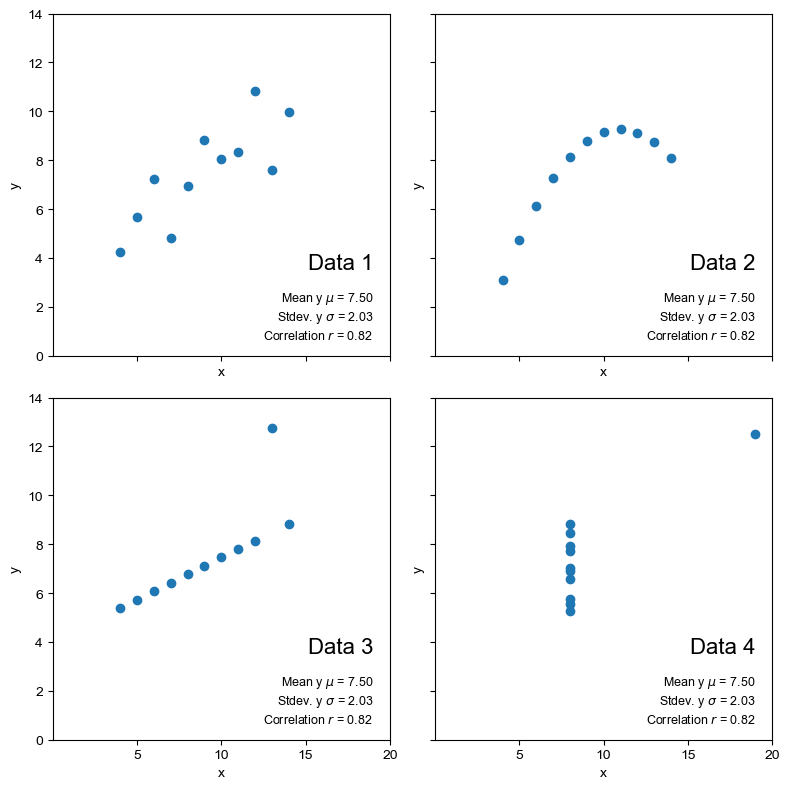

In [7]:
anscombe_plots(anscombe_df, show_stats=True, show_fit=False)

From the scatter plots we can immediately see that the datasets are quite distinct. 
If we calculate a linear regression line through the data, do the coefficients of the equation help to distinguish the data numerically?

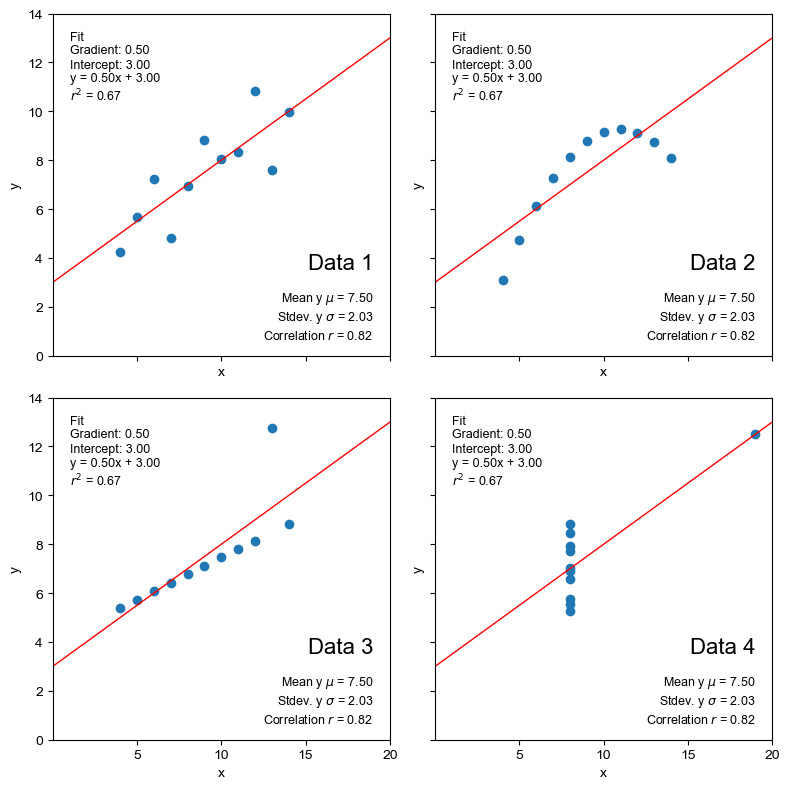

In [8]:
anscombe_plots(anscombe_df, show_stats=True, show_fit=True)

The best fit line is also identical and the r-squared value indicates that numerically, at least, it fits all of the datasets equally well (or badly).

However, we can see from the visualisations that the regression line is only really appropriate for the first dataset.


If we look at some of the other descriptive statistics, particularly relating to the data distribution (max/min, percentiles), these show there are differences between the data. But the simple scatter plot visualisations make the contrasts unmissable.

In the case of Anscombe's quartet, the scatter plots are sufficient to highlight the differences. For more complex data, there are other visualisations that highlight the differences between the distributions of the datasets.

### **Key points summary**

- Visualisation is an essential part of exploratory data analysis.
  - Always explore your datasets visually before applying models or drawing conclusions.

{attribution="John Tukey"}
> “The first step in analyzing data is to look at it.”



#### Things to try/consider

:::{seealso}
Another dataset, called the [Datasaurus Dozen](https://www.research.autodesk.com/publications/same-stats-different-graphs/) has been compiled to highlight how valuable visualisation is when assessing 
data. Data is available [here](https://www.openintro.org/data/index.php?data=datasaurus)
:::

In the case of Anscombe's quartet, the scatter plots are sufficient to highlight the differences. 

For more complex data, there are other visualisations that highlight the differences between the distributions of the datasets. The [seaborn](https://seaborn.pydata.org/index.html) visualisation library makes it particularly straightforward to look at distributions of multiple variables and correlations between variables.

:::{seealso}
[Plotting with Seaborn](https://weisscharlesj.github.io/SciCompforChemists/notebooks/chapter_10/chap_10_notebook.html)
:::

What kinds of plot might help to highlight the differences between the datasets or identify issues that might affect how the data is modelled, e.g. for dataset 3, there is a single isolated point; how does this affect the best-fit linear model; how might this be identified?